In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data
import yfinance as yf
from datetime import date

In [3]:
start = '2010-01-01'
#end = '2024-01-01'
end = date.today()

df = yf.download('AAPL', start=start, end=end)
data = df
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.470739  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.481929  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.378826  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.367033  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.409363  447610800


In [4]:
print(data.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.470739  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.481929  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.378826  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.367033  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.409363  447610800


In [5]:
df.tail()#for dataset end

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-18,168.029999,168.639999,166.550003,167.039993,167.039993,43122900
2024-04-19,166.210007,166.399994,164.080002,165.000000,165.000000,67772100
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48121300


In [6]:
df = df.reset_index()#"to change dates from index to column"
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470742,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [7]:
df = df.drop(['Date' , 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


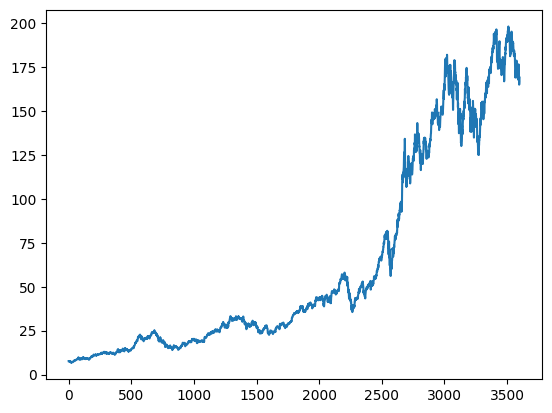

In [8]:
plt.plot(df.Close)

In [9]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3596,168.029999,168.639999,166.550003,167.039993,43122900
3597,166.210007,166.399994,164.080002,165.000000,67772100
3598,165.520004,167.259995,164.770004,165.839996,48116400
3599,165.350006,167.050003,164.919998,166.899994,49537800


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3596    183.0882
3597    182.8385
3598    182.5990
3599    182.3640
3600    182.1605
Name: Close, Length: 3601, dtype: float64

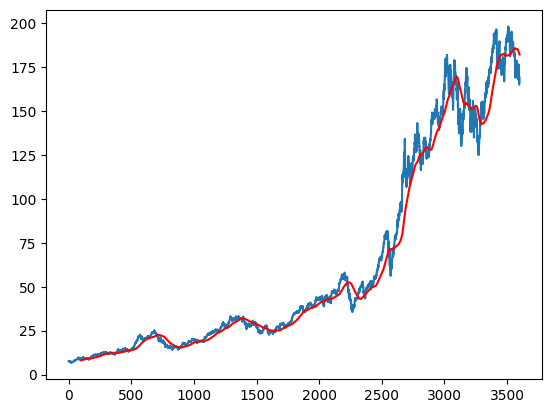

In [11]:
plt.figure(figure = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3596    182.33135
3597    182.19970
3598    182.06985
3599    181.95095
3600    181.85300
Name: Close, Length: 3601, dtype: float64

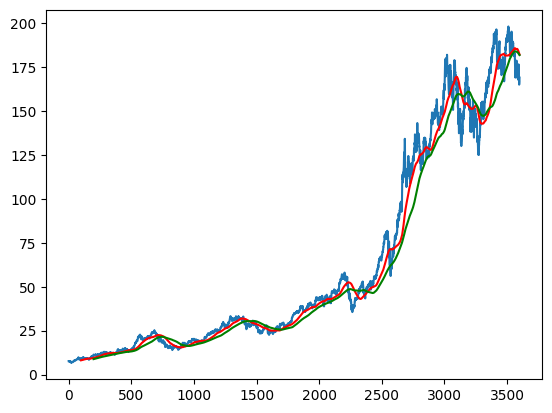

In [13]:
plt.figure(figure = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(3601, 5)

In [15]:
#Splitting data for training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2520, 1)
(1081, 1)


In [16]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [17]:
data_testing.head()

,Close
2520,75.797501
2521,77.407501
2522,77.582497
2523,79.239998
2524,78.169998


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [19]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01149497],
       [0.01168865],
       [0.00990368],
       ...,
       [0.98930062],
       [0.99798465],
       [0.99281829]])

In [20]:
data_training_array.shape

(2520, 1)

In [21]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])#input to 100 values used to predict 101 value to train model
    y_train.append(data_training_array[i,0])#predicted 101 value to train model
x_train , y_train = np.array(x_train) , np.array(y_train)

In [22]:
#ML model
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 123ms/step - loss: 0.0433
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - loss: 0.0046
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0044
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0035
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0032
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0036
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0034
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - loss: 0.0034
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0025
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0029
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - loss: 0.0026
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0028
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0024
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - loss: 0.0022
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - 

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head

<bound method NDFrame.head of            Close
2520   75.797501
2521   77.407501
2522   77.582497
2523   79.239998
2524   78.169998
...          ...
3596  167.039993
3597  165.000000
3598  165.839996
3599  166.899994
3600  169.020004

[1081 rows x 1 columns]>

In [28]:
data_training.tail(100)

,Close
2420,50.435001
2421,51.625000
2422,52.587502
2423,52.590000
2424,53.160000
...,...
2515,73.412498
2516,75.087502
2517,74.357498
2518,74.949997


In [29]:
past_100_days = data_training.tail(100)

In [30]:
import pandas as pd

# Assuming past_100_days and data_testing are DataFrame objects
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

,Close
0,50.435001
1,51.625000
2,52.587502
3,52.590000
4,53.160000


In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00805823],
       [0.01457593],
       ...,
       [0.78147957],
       [0.78865748],
       [0.8030134 ]])

In [33]:
input_data.shape

(1181, 1)

In [34]:
import pandas as pd

# Assuming input_data is a DataFrame or numpy array
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append((input_data[i-100: i]))
    y_test.append(input_data[i, 0])


In [35]:
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1081, 100, 1)
(1081,)


In [36]:
y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [37]:
y_predicted.shape

(1081, 1)

In [38]:
y_test

array([0.17174538, 0.18264771, 0.18383271, ..., 0.78147957, 0.78865748,
       0.8030134 ])

In [39]:
y_predicted

array([[0.17689668],
       [0.17982021],
       [0.18282448],
       ...,
       [0.78626525],
       [0.78278303],
       [0.7780628 ]], dtype=float32)

In [40]:
#for factor by which dat has been scaled down
scaler.scale_

array([0.00677163])

In [41]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

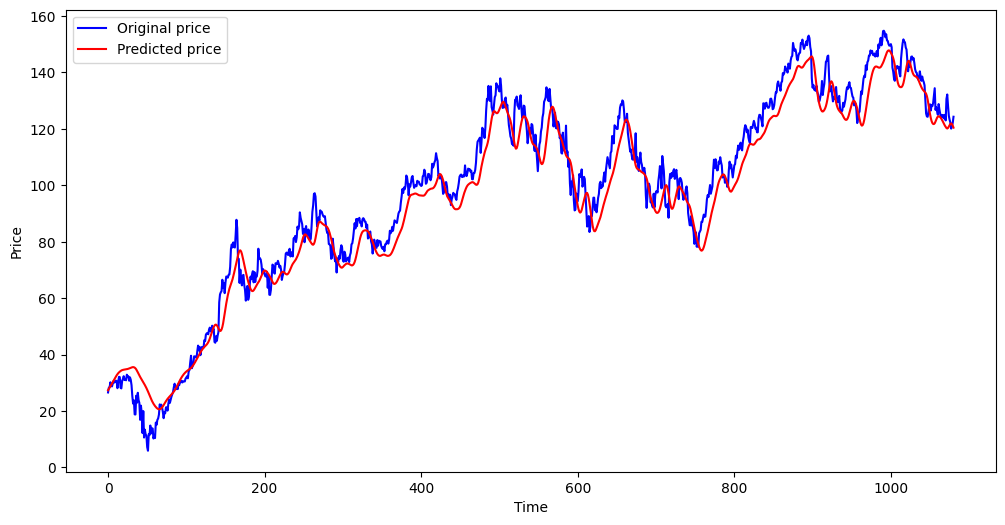

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test , 'b' , label= 'Original price')
plt.plot(y_predicted , 'r' , label= 'Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()